In [85]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import numpy as np
import warnings
warnings.filterwarnings('ignore')

path = "mnt/ssd/kaggle-talkingdata2/competition_files/train_sample.csv"

df = pd.read_csv(path)

print(df.head())
print(df.describe())
print("\nCount of detected fraud:", len(np.argwhere(df['is_attributed'].values == 1)), "of", len(df))

       ip  app  device  os  channel           click_time attributed_time  \
0   87540   12       1  13      497  2017-11-07 09:30:38             NaN   
1  105560   25       1  17      259  2017-11-07 13:40:27             NaN   
2  101424   12       1  19      212  2017-11-07 18:05:24             NaN   
3   94584   13       1  13      477  2017-11-07 04:58:08             NaN   
4   68413   12       1   1      178  2017-11-09 09:00:09             NaN   

   is_attributed  
0              0  
1              0  
2              0  
3              0  
4              0  
                  ip           app         device             os  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean    91255.879670      12.04788      21.771250      22.818280   
std     69835.553661      14.94150     259.667767      55.943136   
min         9.000000       1.00000       0.000000       0.000000   
25%     40552.000000       3.00000       1.000000      13.000000   
50%     79827.000000 

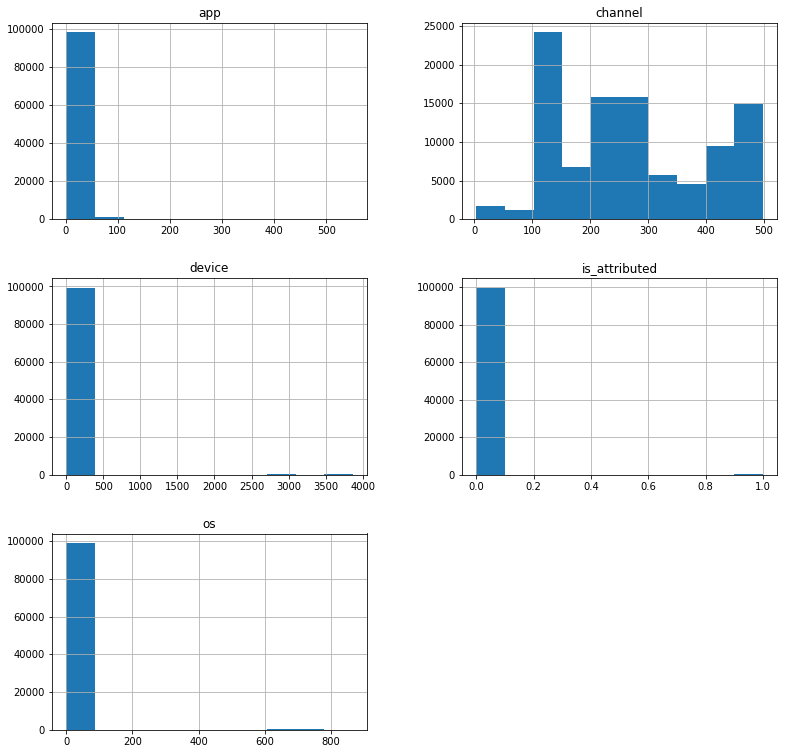

In [86]:
df[['app', 'device', 'os', 'channel', 'is_attributed']].hist(figsize=(13,13))
plt.show()

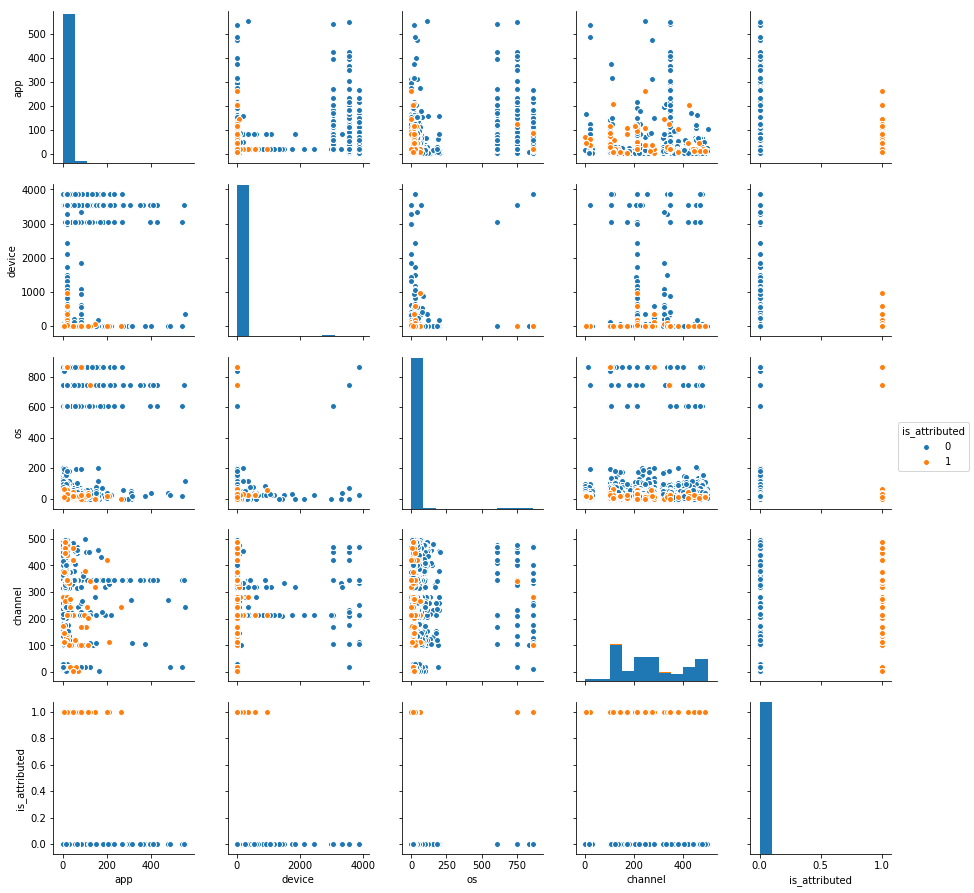

In [87]:
sns.pairplot(df[['app', 'device', 'os', 'channel', 'is_attributed']], hue="is_attributed")

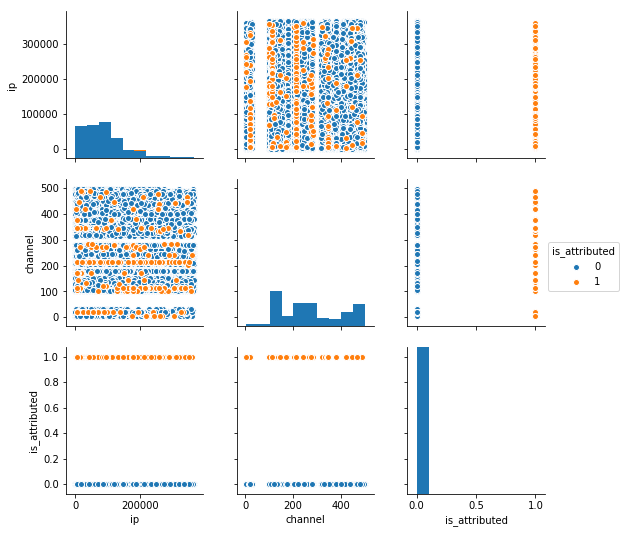

In [88]:
sns.pairplot(df[['ip', 'channel', 'is_attributed']], hue="is_attributed")

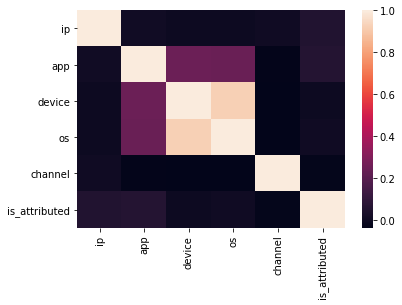

In [89]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

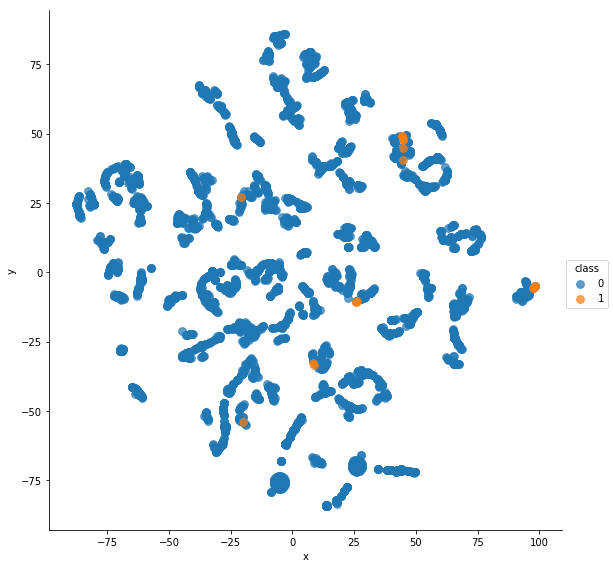

In [90]:
max_samples = 5000
input_features = df[['app', 'device', 'os', 'channel']][:max_samples]
Z = TSNE().fit_transform(input_features)
dftsne = pd.DataFrame(Z, columns=['x','y'])
dftsne['class'] = df[['is_attributed']][:max_samples]
g = sns.lmplot('x', 'y', dftsne, hue='class', fit_reg=False, size=8, scatter_kws={'alpha':0.7,'s':60})


0     9
1    13
2    18
3     4
4     9
Name: click_hour, dtype: int64


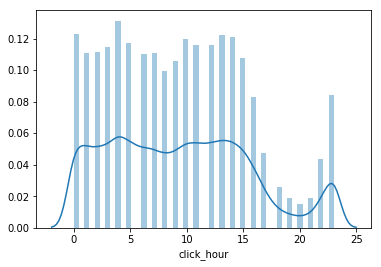

In [91]:
df.loc[:, 'click_time'] = pd.to_datetime(df['click_time'])
df.loc[:, 'click_hour'] = df['click_time'].apply(lambda x: x.hour)
print(df['click_hour'].head())
sns.distplot(df['click_hour'])

count                       227
mean     0 days 01:14:59.572687
std      0 days 02:25:05.392661
min             0 days 00:00:02
25%      0 days 00:00:52.500000
50%             0 days 00:03:18
75%      0 days 01:21:27.500000
max             0 days 12:52:21
dtype: object


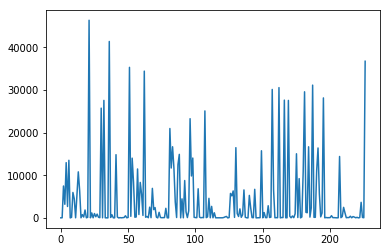

In [92]:
no_nan = df.dropna()
no_nan.loc[:, 'attributed_time'] = pd.to_datetime(no_nan['attributed_time'])
no_nan.loc[:, 'click_time'] = pd.to_datetime(no_nan['click_time'])

#print(no_nan['click_time'].head())
no_nan['time_delta'] = pd.to_timedelta(no_nan['attributed_time'] - no_nan['click_time']).astype('timedelta64[s]')
print(time_diff.describe())
plt.plot(np.arange(len(no_nan)), no_nan['time_delta'])

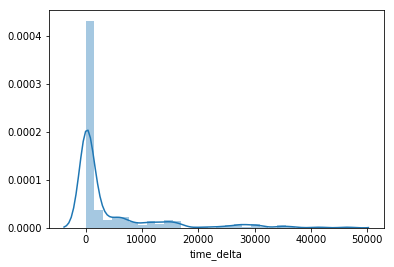

In [93]:
sns.distplot(no_nan['time_delta'])

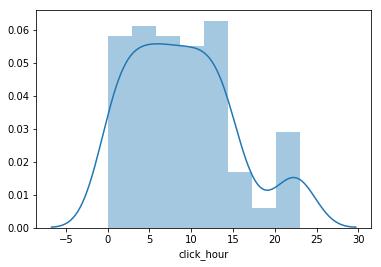

In [94]:
no_nan.loc[:, 'click_hour'] = no_nan['click_time'].apply(lambda x: x.hour)
sns.distplot(no_nan['click_hour'])

<Container object of 23 artists>

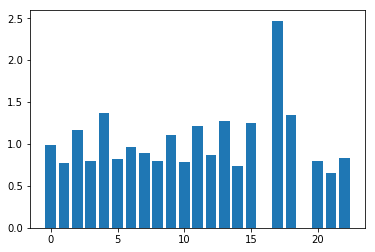

In [95]:
norm_click_hour_dist = np.histogram(df['click_hour'], bins=23, normed=True)
abnorm_click_hour_dist = np.histogram(no_nan['click_hour'], bins=23, normed=True)
norm_vs_abnorm_click_hour = norm_click_hour_dist[0] / abnorm_click_hour_dist[0]
plt.bar(np.arange(len(norm_vs_abnorm_click_hour)), norm_vs_abnorm_click_hour)